In [1]:
import pandas as pd

In [5]:
import os

# Replace 'Employee_data_modified.xlsx' with your actual file name
file_name = 'Employee_data_modified.xlsx'

# Get the absolute path of the file
file_path = os.path.abspath(file_name)

# Display the file path
file_path


'C:\\Users\\USER\\Desktop\\data analysis\\Employee_data_modified.xlsx'

In [7]:
file_name = 'C:\\Users\\USER\\Desktop\\data analysis\\Employee_data_modified.xlsx'

In [11]:
df = pd.read_excel(file_name)
df.head()

,Employee_id,Department,Region,Education,Gender,Recruitment_channel,No_of_trainings,Age,Previous_year_rating,Length_of_service,KPIs_met_more_than_80,Awards_won,Avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,3.345545,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.000000,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.000000,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.000000,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.000000,7,0,0,61


## using desriptive statistics to check for outliers

In [12]:
# Assuming your DataFrame is named 'df'
summary_stats = df.describe()
print(summary_stats)


        Employee_id  No_of_trainings           Age  Previous_year_rating  \
count  17413.000000     17413.000000  17413.000000          17413.000000   
mean   39079.357434         1.250732     34.808247              3.345545   
std    22707.709738         0.595724      7.694819              1.214612   
min        3.000000         1.000000     20.000000              1.000000   
25%    19280.000000         1.000000     29.000000              3.000000   
50%    39113.000000         1.000000     33.000000              3.000000   
75%    58836.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       Length_of_service  KPIs_met_more_than_80    Awards_won  \
count       17413.000000           17413.000000  17413.000000   
mean            5.801585               0.358812      0.023373   
std             4.175849               0.479666      0.151091   
min             1.000000               0.000000      0.

## using a box plot to check for outliers

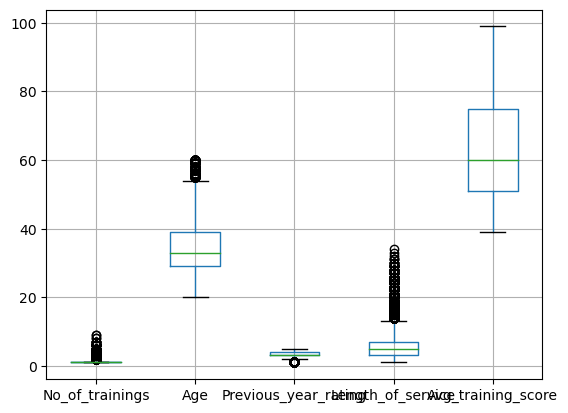

In [14]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df.boxplot(column=['No_of_trainings', 'Age', 'Previous_year_rating', 'Length_of_service', 'Avg_training_score'])
plt.show()


## using Z-score to check for outliers

In [17]:
from scipy.stats import zscore


numeric_cols = df.select_dtypes(include='number')
z_scores = abs(zscore(numeric_cols))

# Threshold for considering a data point as an outlier (e.g., 3)
threshold = 3
outliers = (z_scores > threshold).all(axis=1)

# Display rows with outliers
df[outliers]


,Employee_id,Department,Region,Education,Gender,Recruitment_channel,No_of_trainings,Age,Previous_year_rating,Length_of_service,KPIs_met_more_than_80,Awards_won,Avg_training_score


#### In conclusion, there were no outliers found